In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawDF = pd.read_csv("Amazon Sale Report.csv")

rawDF.head()

C:\Users\brayj\AppData\Local\Temp\ipykernel_12088\2465671800.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  rawDF = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
columnsToDelete = ["index","Order ID", "Date","Style","SKU","ship-state","ship-city","B2B","ASIN","ship-country","promotion-ids","ship-postal-code","Unnamed: 22"]
cleanedDF = rawDF.drop(columnsToDelete, axis = 1)
cleanedDF.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,fulfilled-by
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,NaN,0,INR,647.62,Easy Ship
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,INR,406.00,Easy Ship
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,INR,329.00,NaN
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,NaN,0,INR,753.33,Easy Ship
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,INR,574.00,NaN


In [4]:
cleanedDF.describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [5]:
sizeGroup = cleanedDF.groupby("Size").size()
sizeGroup


Size
3XL     14816
4XL       427
5XL       550
6XL       738
Free      378
L       22132
M       22711
S       17090
XL      20876
XS      11161
XXL     18096
dtype: int64

In [6]:
cleanedDF["Size"].value_counts()

Size
M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       738
5XL       550
4XL       427
Free      378
Name: count, dtype: int64

In [7]:
cleanedDF.dtypes

Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
fulfilled-by           object
dtype: object

In [8]:
# Before NaN cleaning 
for col in cleanedDF:
    naCount = cleanedDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the Status col is 0
The number of na values in the Fulfilment col is 0
The number of na values in the Sales Channel  col is 0
The number of na values in the ship-service-level col is 0
The number of na values in the Category col is 0
The number of na values in the Size col is 0
The number of na values in the Courier Status col is 6872
The number of na values in the Qty col is 0
The number of na values in the currency col is 7795
The number of na values in the Amount col is 7795
The number of na values in the fulfilled-by col is 89698


In [9]:
# For simplicity in this dataset I am replacing the NaN values in Courier Status with Not shipped
cleanedDF["Courier Status"] = cleanedDF["Courier Status"].fillna("Not Shipped")
cleanedDF["fulfilled-by"] = cleanedDF["fulfilled-by"].fillna("Unknown")
cleanedDF["currency"] = cleanedDF["currency"].fillna("Unknown")
cleanedDF["Amount"] = cleanedDF["Amount"].fillna(0)
cleanedDF.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,fulfilled-by
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,Not Shipped,0,INR,647.62,Easy Ship
1,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,Shipped,1,INR,406.00,Easy Ship
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,INR,329.00,Unknown
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,Not Shipped,0,INR,753.33,Easy Ship
4,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,Shipped,1,INR,574.00,Unknown


In [10]:
# After NaN cleaning
for col in cleanedDF:
    naCount = cleanedDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the Status col is 0
The number of na values in the Fulfilment col is 0
The number of na values in the Sales Channel  col is 0
The number of na values in the ship-service-level col is 0
The number of na values in the Category col is 0
The number of na values in the Size col is 0
The number of na values in the Courier Status col is 0
The number of na values in the Qty col is 0
The number of na values in the currency col is 0
The number of na values in the Amount col is 0
The number of na values in the fulfilled-by col is 0


In [11]:
# Cleaning the Status Column of the Dataset to make it easier to demonstrate

cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Delivered to Buyer", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Returned to Seller", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Damaged", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Lost in Transit", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Out for Delivery", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Picked Up", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Rejected by Buyer", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipped - Returning to Seller", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Shipping", "Shipped")
cleanedDF["Status"] = cleanedDF["Status"].str.replace("Pending - Waiting for Pick Up", "Pending")



In [12]:
# Cleaning the Size Column of the DataSet to make it easier to demonstrate
cleanedDF["Size"] = cleanedDF["Size"].str.replace("3XL", "Larger than 2XL")
cleanedDF["Size"] = cleanedDF["Size"].str.replace("4XL", "Larger than 2XL")
cleanedDF["Size"] = cleanedDF["Size"].str.replace("5XL", "Larger than 2XL")
cleanedDF["Size"] = cleanedDF["Size"].str.replace("6XL", "Larger than 2XL")
cleanedDF = cleanedDF[~cleanedDF["Size"].str.contains("Free")]

In [13]:
# Function for making bar charts for aDF and columnName
def makeBarValueCount(aDF, colName, bar_colors=None):
    if bar_colors is None:
        bar_colors = 'blue' 
    aDF[colName].value_counts().plot(kind='bar', figsize=(9, 8), color=bar_colors)
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)    
    plt.title(f"The Count in the {colName} Column")
    plt.show()

In [14]:
# Function for making pie charts for aDF and columnName
def makePieChart(aDF, colName, colorArray):
    aGroup = aDF.groupby(colName).size()
    plt.pie(aGroup, 
        labels = aGroup.index,
        autopct= '%1.0f%%',
        colors= colorArray)
    plt.title(f"Percentages of {colName} Groups")
    plt.show()


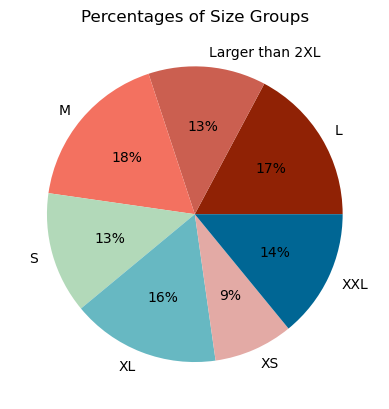

In [30]:
makePieChart(cleanedDF, "Size", ["#902205","#CB5F50","#F37160","#B2D9B9","#67b8C2","#E3AAA5","#006694"])

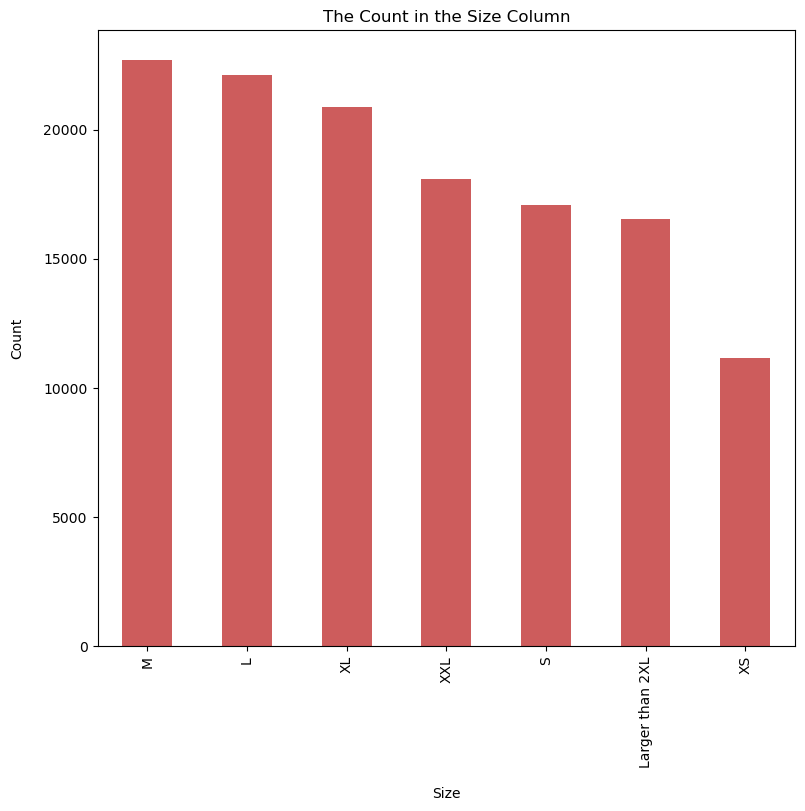

In [15]:
#Bar chart showing the percentages of sizes
makeBarValueCount(cleanedDF, "Size", ["indianred"])

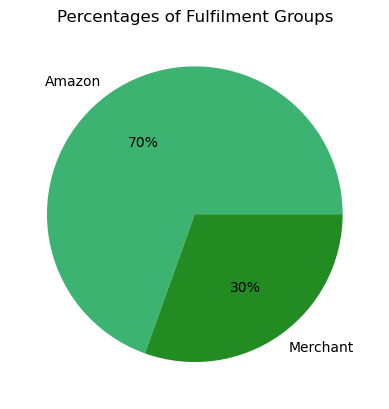

In [16]:
makePieChart(cleanedDF, "Fulfilment", ["mediumseagreen","forestgreen"])

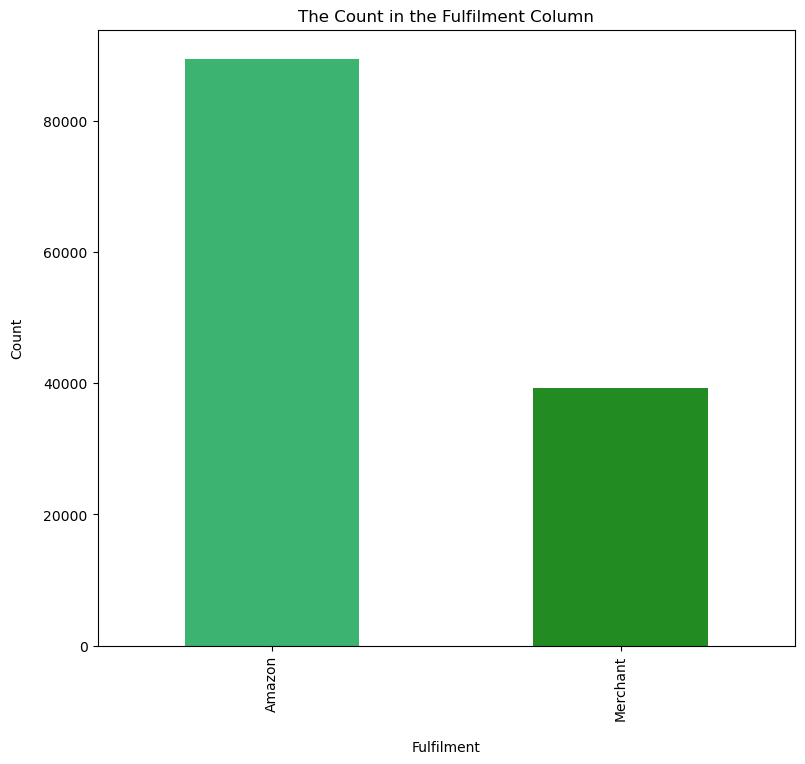

In [17]:
makeBarValueCount(cleanedDF,"Fulfilment",["mediumseagreen","forestgreen"])

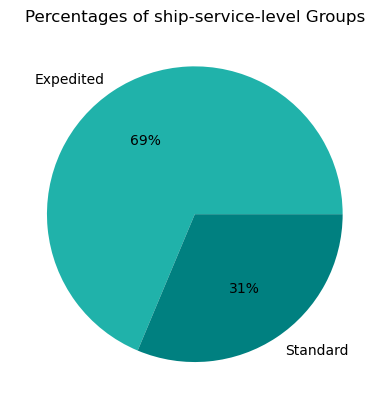

In [18]:
makePieChart(cleanedDF, "ship-service-level",["lightseagreen","teal"])

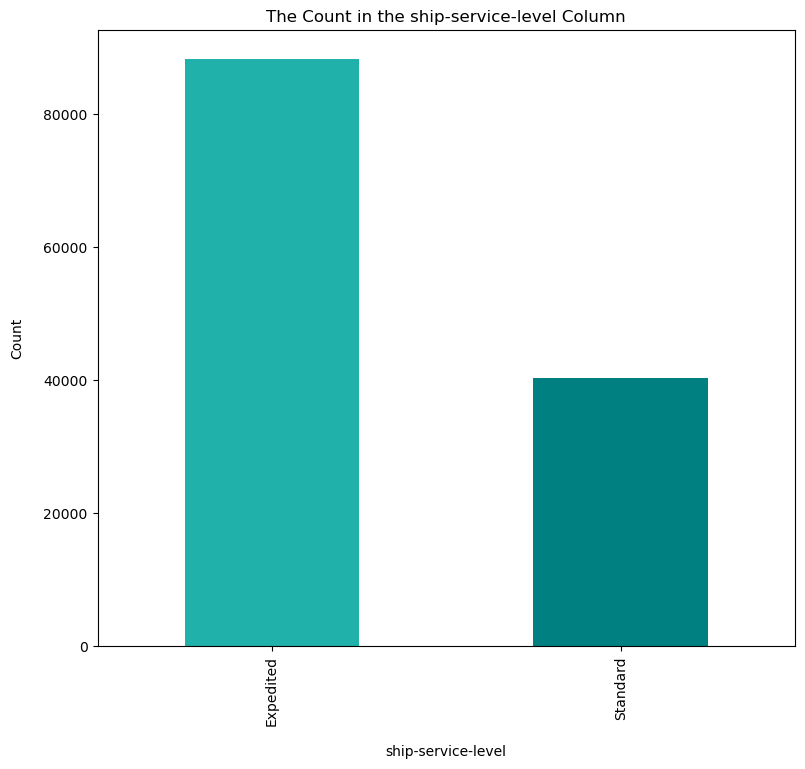

In [19]:
makeBarValueCount(cleanedDF, "ship-service-level", ["lightseagreen","teal"])

In [20]:
group = cleanedDF.groupby("Status").size()
group


Status
Cancelled     18283
Pending         938
Shipped      109376
dtype: int64

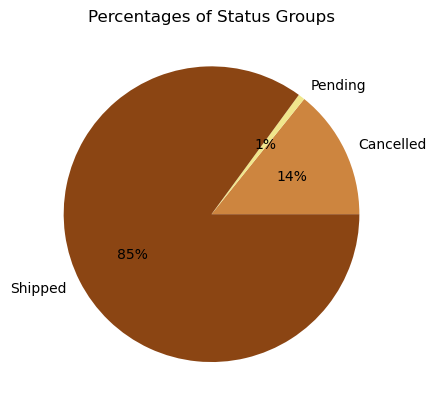

In [21]:
# Pie chart for the status section of the dataset
makePieChart(cleanedDF, "Status", ["peru","khaki","saddlebrown"])

In [22]:
expeditedDF = cleanedDF.loc[cleanedDF["ship-service-level"].str.contains("Expedited", na=False)]
expeditedDF.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,fulfilled-by
2,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,Shipped,1,INR,329.0,Unknown
4,Shipped,Amazon,Amazon.in,Expedited,Top,Larger than 2XL,Shipped,1,INR,574.0,Unknown
5,Shipped,Amazon,Amazon.in,Expedited,Set,XL,Shipped,1,INR,824.0,Unknown
6,Shipped,Amazon,Amazon.in,Expedited,Set,L,Shipped,1,INR,653.0,Unknown
8,Cancelled,Amazon,Amazon.in,Expedited,Set,Larger than 2XL,Cancelled,0,Unknown,0.0,Unknown


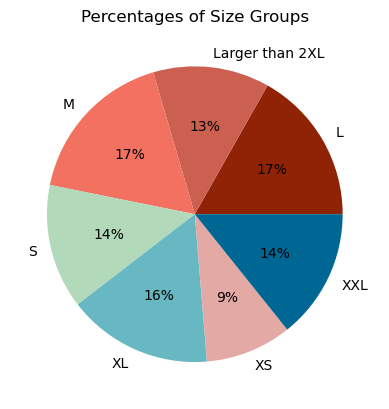

In [23]:
# Pie Chart for the sizes that were expedited
makePieChart(expeditedDF, "Size", ["#902205","#CB5F50","#F37160","#B2D9B9","#67b8C2","#E3AAA5","#006694"])

In [24]:
standardDF = cleanedDF.loc[cleanedDF["ship-service-level"].str.contains("Standard", na=False)]
standardDF.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,fulfilled-by
0,Cancelled,Merchant,Amazon.in,Standard,Set,S,Not Shipped,0,INR,647.62,Easy Ship
1,Shipped,Merchant,Amazon.in,Standard,kurta,Larger than 2XL,Shipped,1,INR,406.00,Easy Ship
3,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,Not Shipped,0,INR,753.33,Easy Ship
7,Shipped,Merchant,Amazon.in,Standard,kurta,S,Shipped,1,INR,399.00,Easy Ship
12,Shipped,Merchant,Amazon.in,Standard,kurta,XS,Shipped,1,INR,399.00,Easy Ship


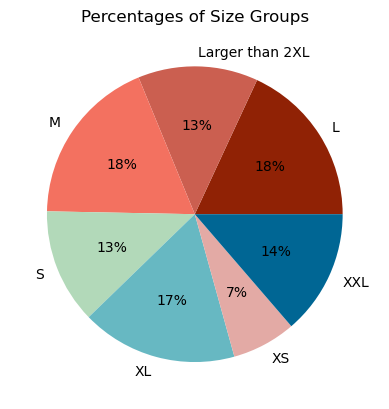

In [25]:
# Pie Chart for the sizes that were shipped standardly

makePieChart(standardDF, "Size", ["#902205","#CB5F50","#F37160","#B2D9B9","#67b8C2","#E3AAA5","#006694"])

In [28]:
quantityGroup = cleanedDF.groupby("Qty").size()
quantityGroup

Qty
0      12770
1     115448
2        336
3         29
4          9
5          2
8          1
9          1
13         1
dtype: int64

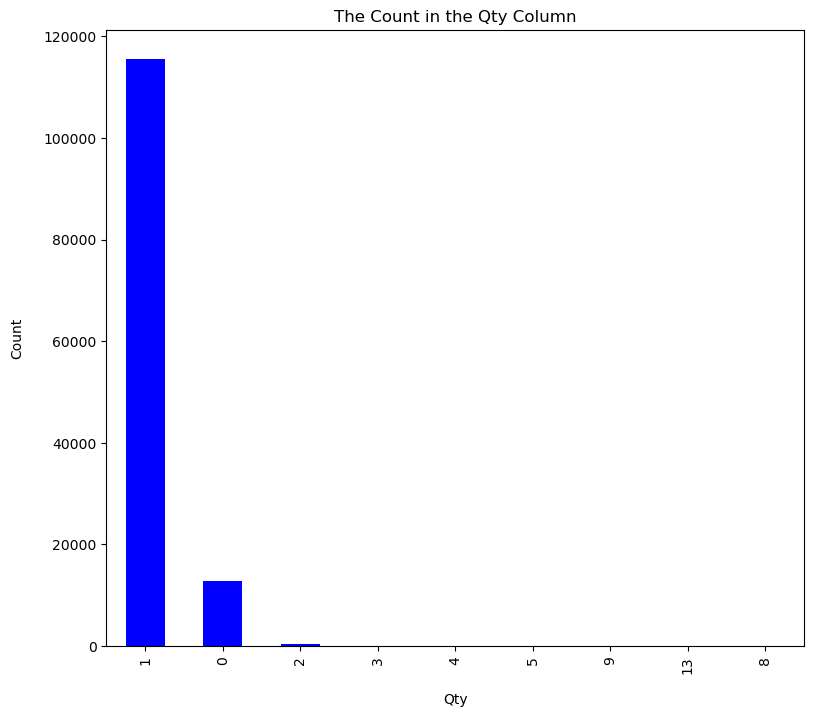

In [29]:
# Graph for the amount of each item that was purchased.
makeBarValueCount(cleanedDF, "Qty")